In [2]:
include("functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [5]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialize constants
constants = Constants(36,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-8, solver = :Broyden, max_iter = 5000);

36.1.0e-8.100.Broyden
Branch point 10 of 100, 5 iterations.
Branch point 20 of 100, 5 iterations.
Branch point 30 of 100, 5 iterations.
Branch point 40 of 100, 5 iterations.
Branch point 50 of 100, 5 iterations.
Branch point 60 of 100, 5 iterations.
Branch point 70 of 100, 5 iterations.
Branch point 80 of 100, 5 iterations.
Branch point 90 of 100, 5 iterations.
Branch point 100 of 100, 12 iterations.
  0.861483 seconds (62.83 M allocations: 2.392 GiB, 12.15% gc time)


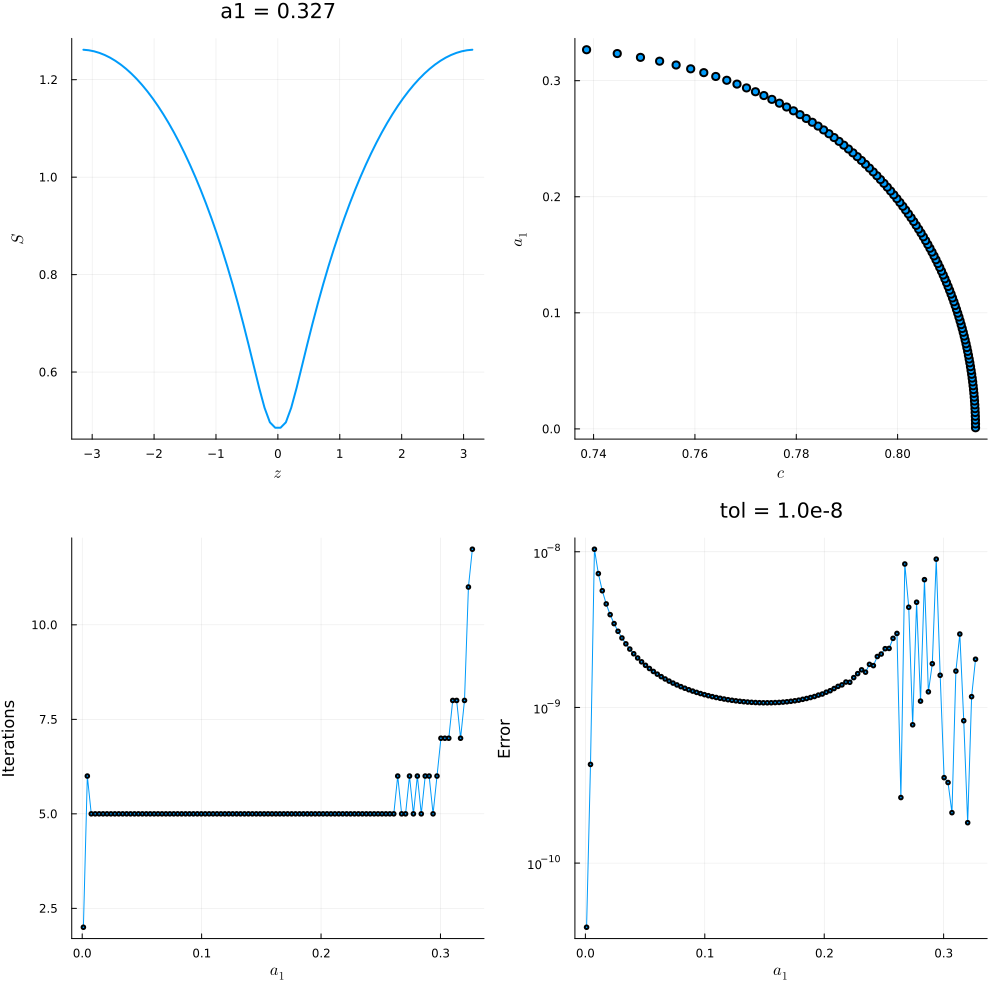

In [7]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("36.1.0e-8.100.Broyden")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))